In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def findMaxProfit(P: list, k: int, money: int):
    # P - list of stock prices in a range of days <1, k>
    # k - amount of days among which we are going to find max profit
    
    #calculate derivative of the price lists to find out when proce grows, when drops
    P_diff = np.diff(P)

    # append with value which will not affect the algoryth, because derivative returns n-1 arguments
    P_diff = np.append(P_diff, -1) 

    # make some plots, not obligatory
    makePlot(P, k, P_diff)

    #if tan > 0 ==> next day the price will be higher ==> it is worth buying, not selling
    #if tan < 0 ==> next day the price will be lower ==> it is worth selling, not buying
    my_shares = 0

    for day in range(0, k):
        # buy shares 
        if(P_diff[day] > 0):
            my_shares = my_shares + buyShares(P, day, money)
            money = 0

        # sell shares
        elif (P_diff[day] < 0):
            money = money + sellShares(P, day, my_shares) 
            my_shares = 0

    return money



def buyShares(P: list, day: int, money: float):
    return money / P[day]

def sellShares(P: list, day: int, shares: float):
    return P[day] * shares


def makePlot(P: list, k: int, y_tan: list):
    fig = plt.figure(figsize=(20,20))
    
    x = range(1, k+1)
    plt.subplot(2, 1, 1)
    plt.plot(x, P, '.-')
    plt.title('Stock values')
    plt.xlabel('days')
    plt.ylabel('Price per one share')
    plt.xticks(x)

    x2 = x = range(1, k+1)
    plt.subplot(2, 1, 2)
    plt.plot(x2, y_tan, '.-')
    plt.title('Derivative values')
    plt.xlabel('days')
    plt.ylabel('tangens value')
    plt.hlines(0,0,len(x))
    plt.xticks(x)

900000.0

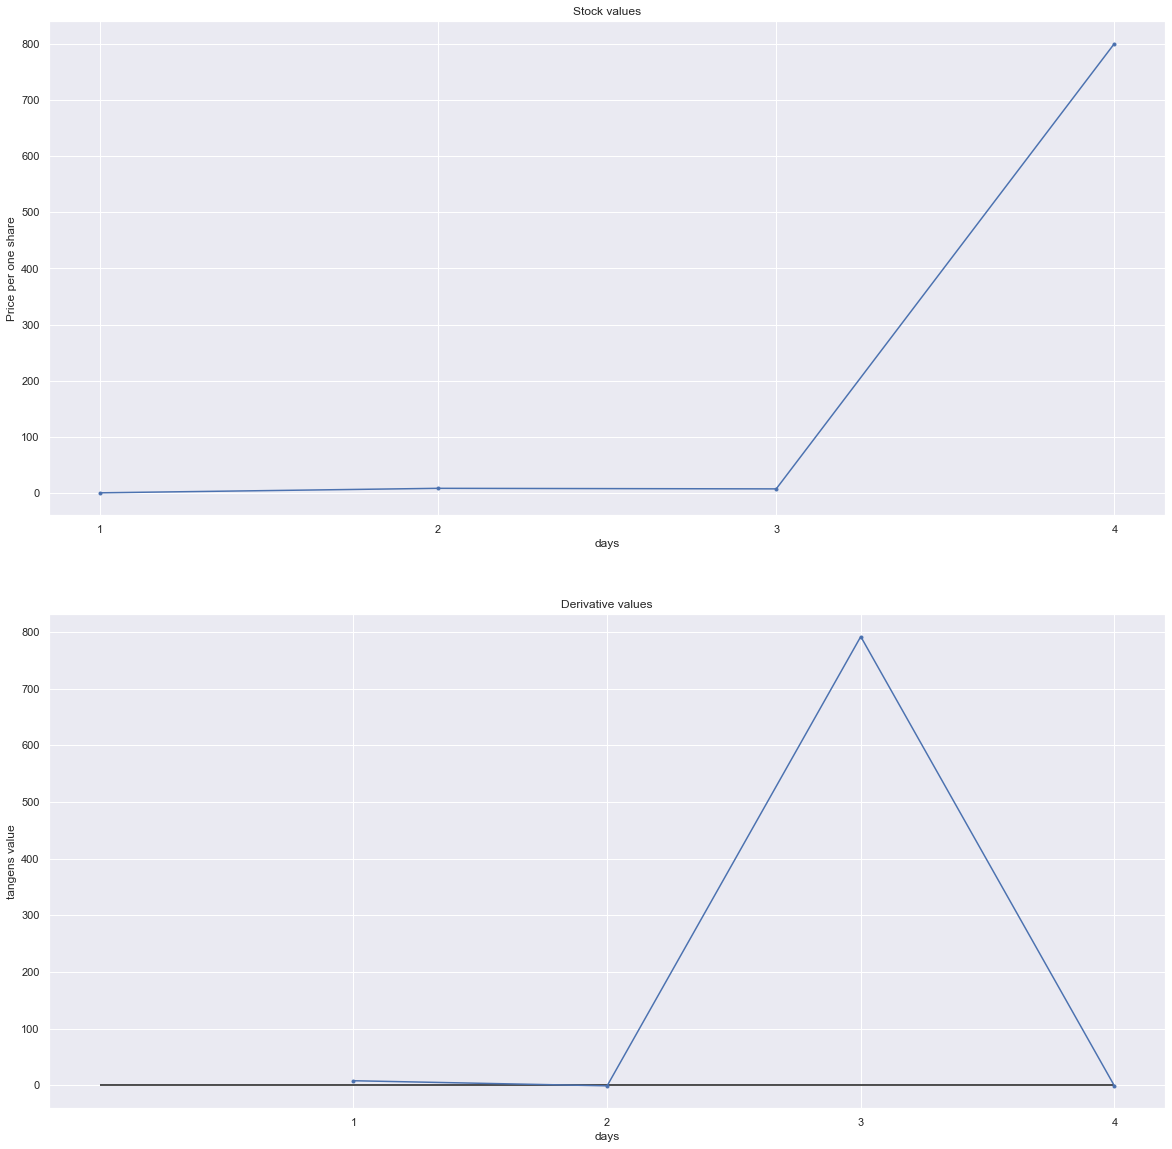

In [269]:
findMaxProfit( np.array([1, 9, 8, 800]), 4, 1000)